### 데이터에 대한 이해를 높이기 위하여 통계량을 산출하고 그래프들을 그리고 해석하라.
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
### -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, robust_scale,minmax_scale
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
#ds_bcancer = pd.read_excel("./과제파일/유방암.xlsx", sheet_name = '유방암')
ds_bcancer = pd.read_csv("./과제파일/유방암.csv",engine = "python")

In [3]:
ds_bcancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
ds_bcancer.isnull().sum() # 일단 결측치는 없는 데이터

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
# 보아하니 diagnosis만 이산형(범주형)데이터 / 0이면 악성, 1이면 양성
ds_bcancer_numeric = ds_bcancer.select_dtypes(exclude = "object")
ds_bcancer_numeric.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# diagnosis 변수의 개수를 세는 함수에 대해서 알아보고 싶었음.
# benign은 0, malignant는 1로 생각하고 하면 됨.
ds_bcancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
# 데이터에 대한 이해를 높이기 위하여 통계량을 산출하고 그래프들을 그리고 해석해보자.
# 보기 좋게 Transpose함 .T or .transpose()
ds_bcancer_numeric.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.373,0.484,0.000,0.000,0.000,1.000,1.000
mean radius,569.0,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.0,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.0,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.0,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.0,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.0,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.0,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.0,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.0,0.181,0.027,0.106,0.162,0.179,0.196,0.304


In [8]:
# 목표변수 diagnosis를 포함한 상관분석
ds_bcancer_numeric.corr().round(3)
# 한 눈에 보이지 않음. Heatmap으로

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,1.000,0.730,0.415,0.743,0.709,0.359,0.597,0.696,0.777,0.330,...,0.776,0.457,0.783,0.734,0.421,0.591,0.660,0.794,0.416,0.324
mean radius,0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


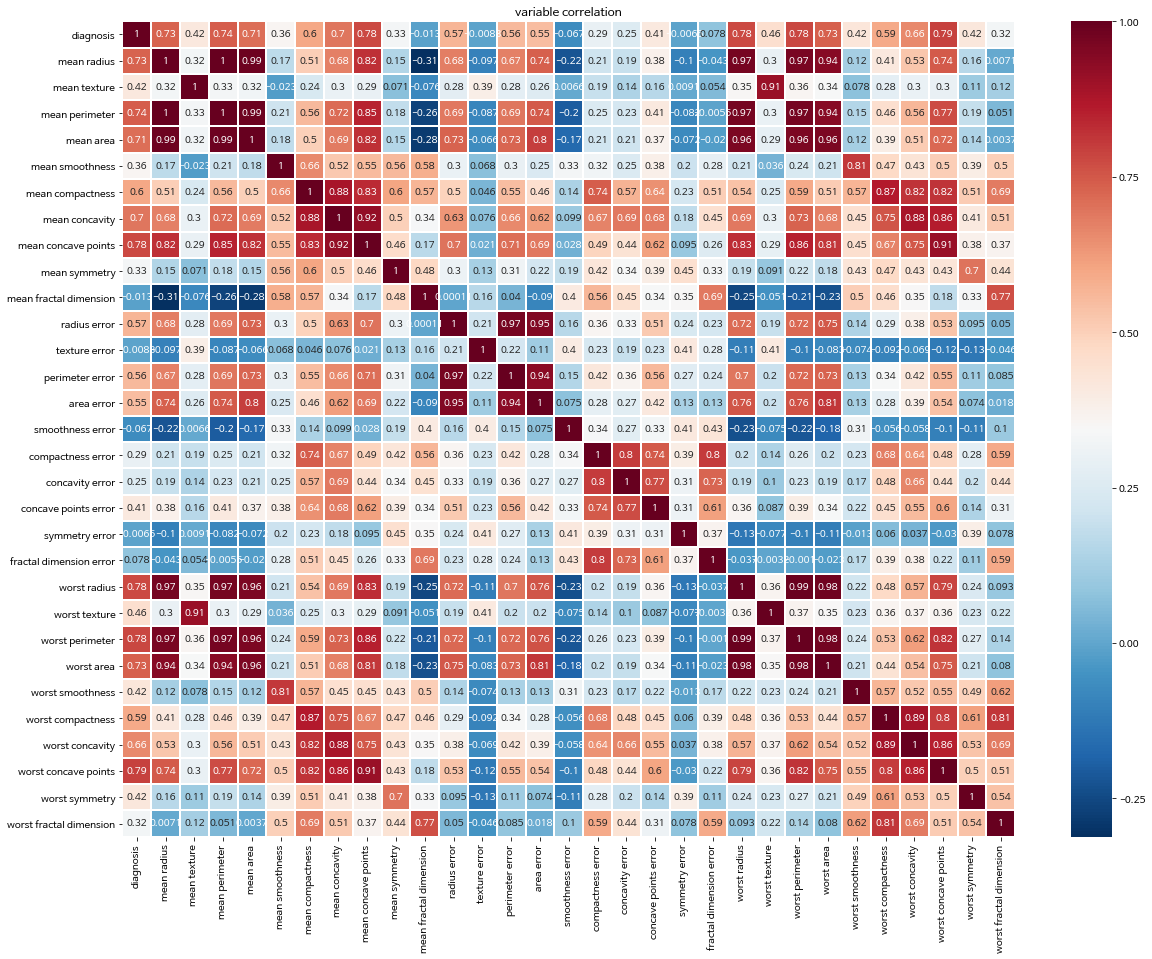

In [9]:
# Heatmap으로 볼 때 더 직관적임.
plt.figure(figsize=(20,15))
plt.title('variable correlation')
sns.heatmap(ds_bcancer_numeric.corr(),cmap = "RdBu_r",linewidth = 1,annot= True)
# 출력결과 더블클릭하면 커짐.

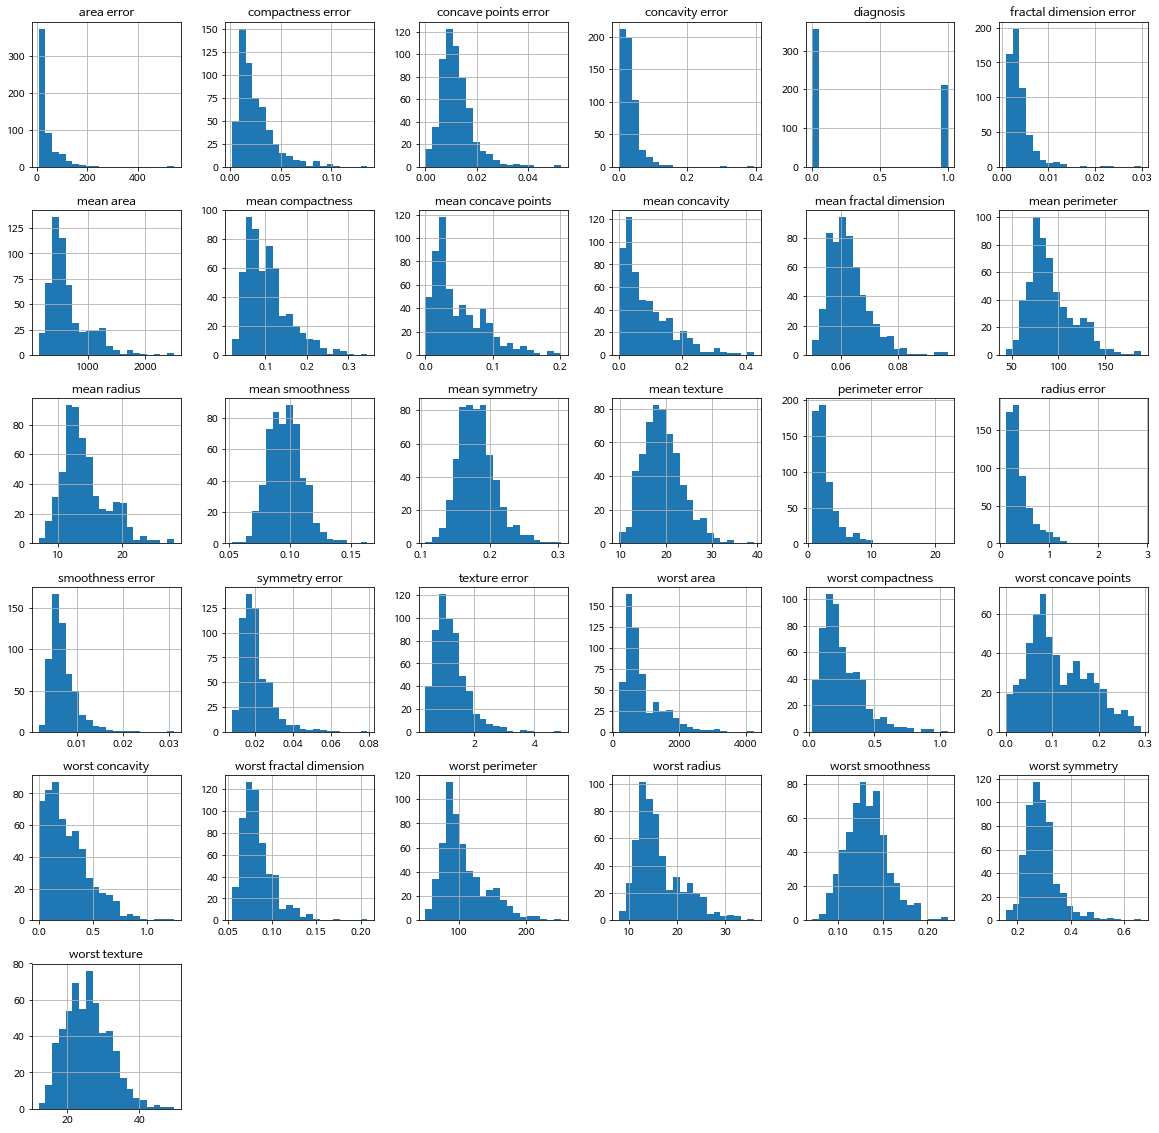

In [21]:
ds_bcancer.hist(figsize = (20,20), bins = 20); #;를 끝에 입력하면 잡다한 array 정보들 안나옴.

## 그리고 0과 1에 따라서 수치가 다를 거라고 생각해서 따로 나눠서 변수를 만듦
## Boxplot이 잘 보이게 하기 위해서 데이터를 10개씩 나눠서 그림

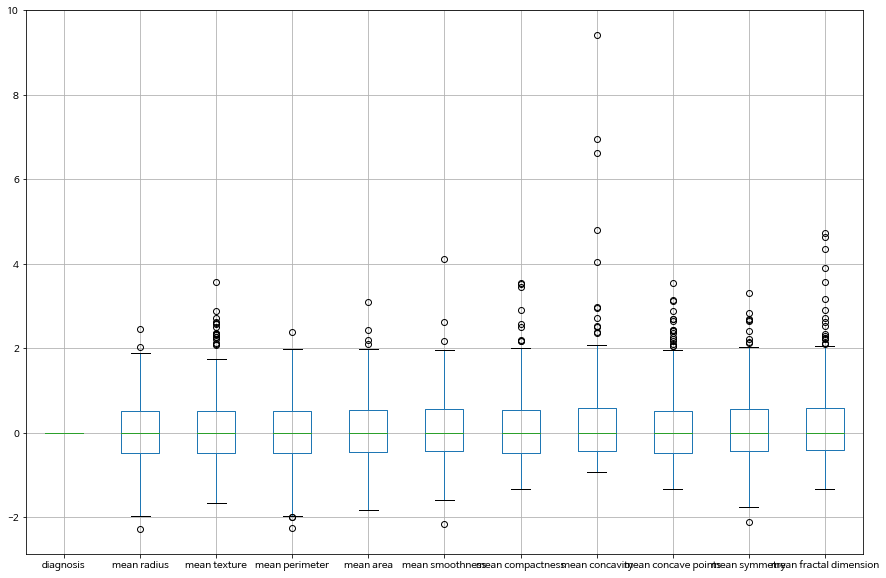

In [11]:
ds_bcancer0 = ds_bcancer.query("diagnosis == 0")
ds_bcancer1 = ds_bcancer.query("diagnosis == 1")

ds_robust_bcancer0 = robust_scale(ds_bcancer0)
ds_robust_bcancer0 = pd.DataFrame(ds_robust_bcancer0, columns = ds_bcancer_numeric.columns)
ds_robust_bcancer1 = robust_scale(ds_bcancer1)
ds_robust_bcancer1 = pd.DataFrame(ds_robust_bcancer1, columns = ds_bcancer_numeric.columns)

ds_robust_bcancer0.iloc[:,0:11].boxplot(figsize = (15,10))

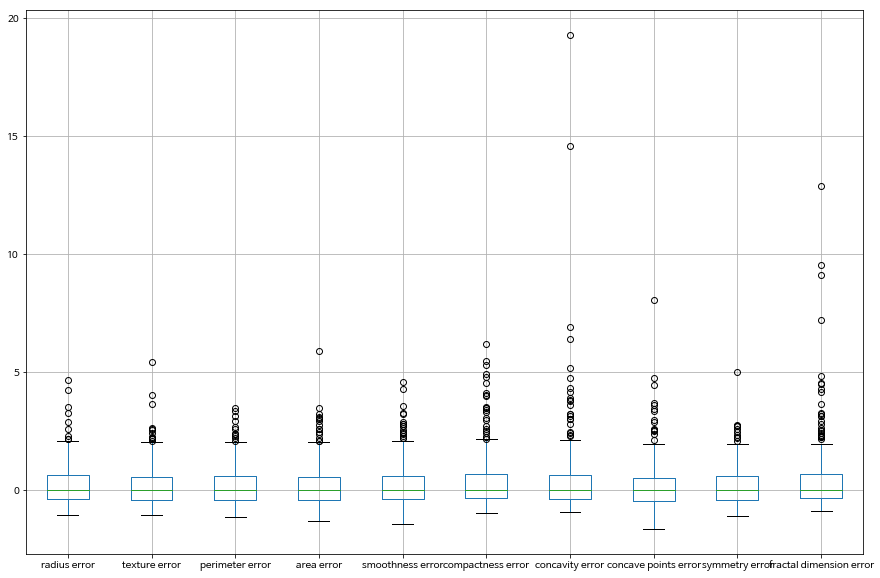

In [12]:
ds_robust_bcancer0.iloc[:,11:21].boxplot(figsize = (15,10))

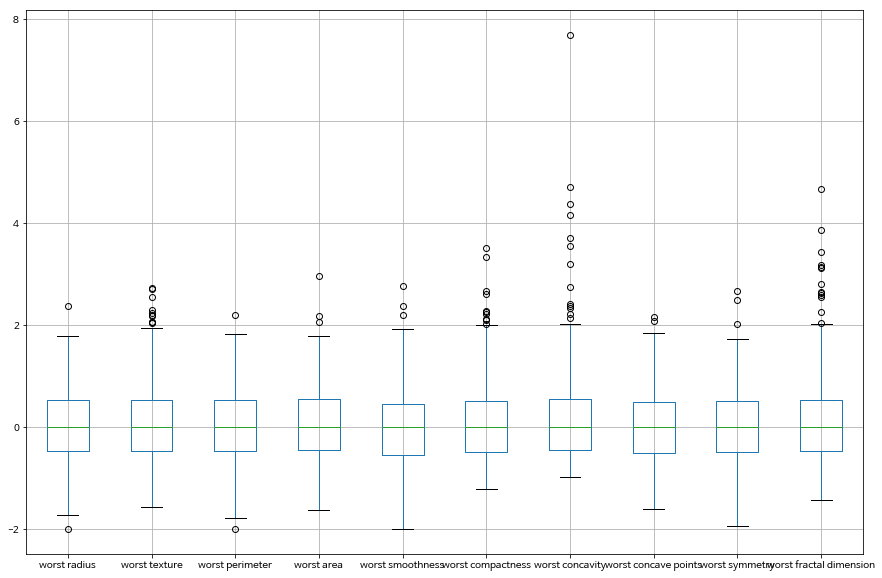

In [13]:
ds_robust_bcancer0.iloc[:,21:32].boxplot(figsize = (15,10))

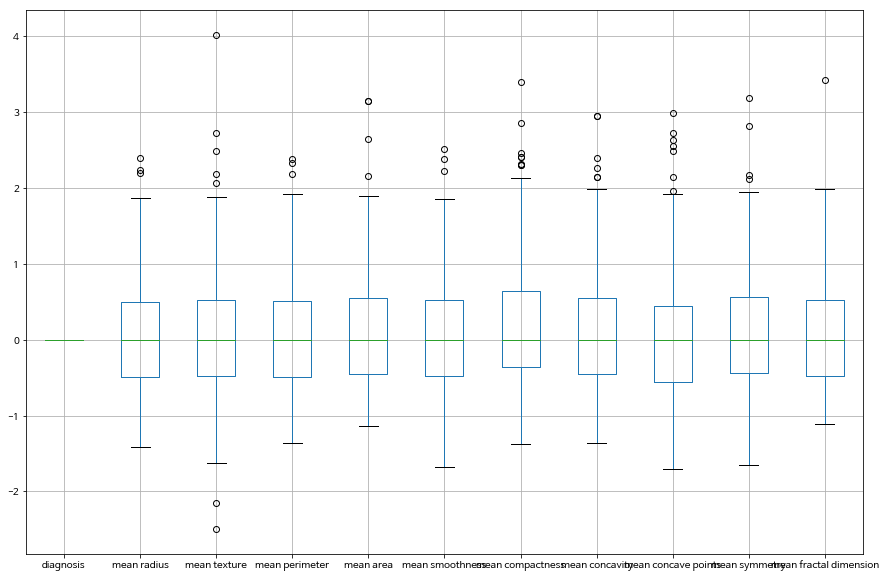

In [14]:
ds_robust_bcancer1.iloc[:,0:11].boxplot(figsize = (15,10))

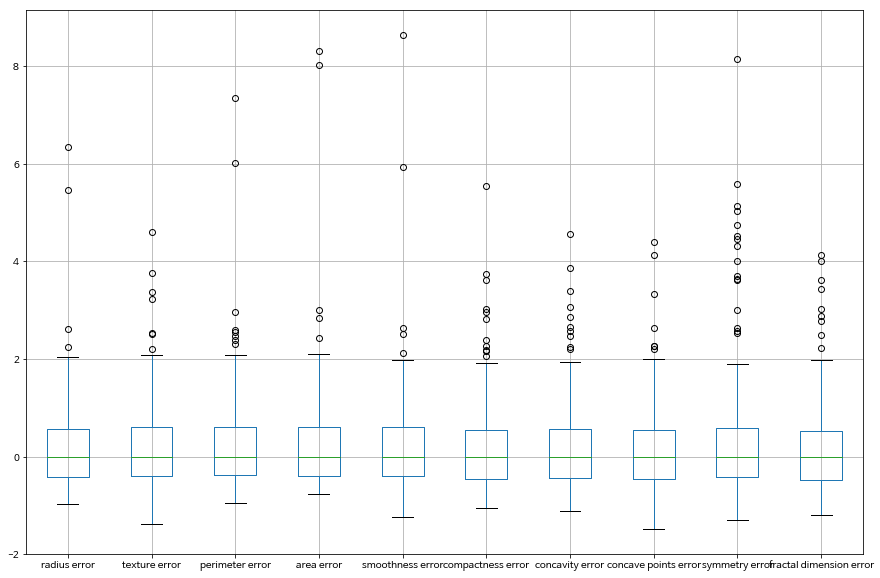

In [15]:
ds_robust_bcancer1.iloc[:,11:21].boxplot(figsize = (15,10))

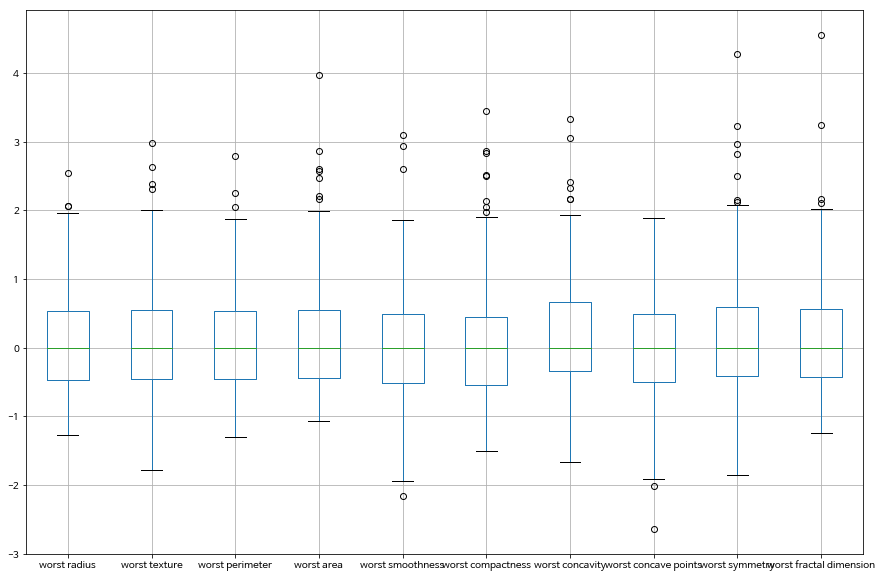

In [16]:
ds_robust_bcancer1.iloc[:,21:32].boxplot(figsize = (15,10))

In [17]:
df_corr = ds_bcancer_numeric.corr()
df_corr["diagnosis"].sort_values(ascending=False)
# reset_index() 메소드를 쓰면 기존의 인덱스는 하나의 열로 생기고 새로운 순서인덱스가 생성됨.
df_for_selection = pd.DataFrame(df_corr['diagnosis'].sort_values(ascending=False)).reset_index()
df_for_selection
for i in range(df_for_selection.shape[0]):
    if abs(df_for_selection["diagnosis"][i]) > 0.6:
        print(df_for_selection["index"][i])

diagnosis
worst concave points
worst perimeter
mean concave points
worst radius
mean perimeter
worst area
mean radius
mean area
mean concavity
worst concavity


In [18]:
#이렇게 하면 안되겠다는 느낌쓰.
#WHY? 악성종양인 사람들이 이상치로 엄청 많이 갈거기 때문
#그런데 mean area/area error/worst area는 이상치가 많은 걸로 봐서 diagnosis가 0, 1인가에 따라서 차이가 있을 것 같음.
#범주형 목표변수와 연속형 설명변수 사이의 관계라 ANOVA분석이 적절할 것 같음.
